#### Analysis of Radial PDF
We have a trap that works in a 2 dimensional sapce (mosylt, as our system can ignore the z-axis). In this sense and up to this point, we have just analyzed one component when we could have been analyzing the radial displacement of the particle. As we know, the trap follows that:

$$ U = \frac{1}{2}k(x^2+y^2) = \frac{1}{2}kr^2 $$

So, we should see for the radial case a similar behavior than in our axes. The only difference we would expect to observe, is that our displacement cannot reach negative values, i.e., $r \in [0, \infty)$. So, we would expect a "folded" gaussian function.

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
from scipy.stats import norm

# Parameters of the Simulation
tot_time = 180
t_stat = 10 # We suppose at this time the system got into an stationary state
tot_runs = 100
fmag = 7.2

# Extract Relevant Data from Sample
dir_sample = r"./mag&freq/" + r"/data_fmag1_ffreq3_2runs/" + "results.csv"
sample = pd.read_csv(dir_sample)
tot_frames = len(sample["frame"].tolist())/2
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))

# General data for stationary analysis
t_stat_idx = np.argmin(np.abs(time_array - t_stat))
n_data = len(time_array[t_stat_idx:-1])

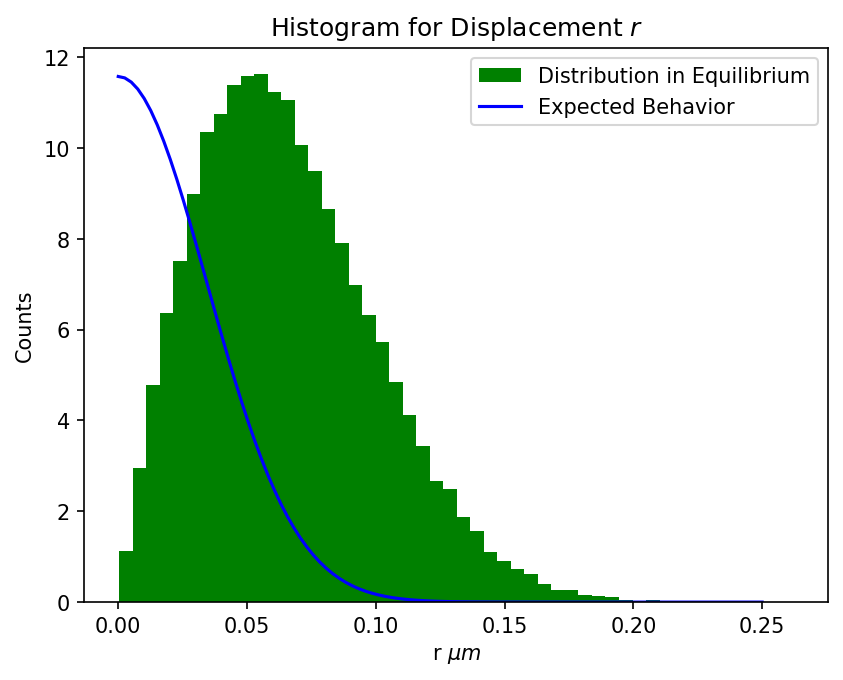

In [114]:
# Import Data 
dir_data = r"./mag&freq/" + f"/data_fmag0_ffreq0_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
r_array_eq = np.zeros(tot_runs * n_data)
x_array_eq = np.zeros(tot_runs * n_data)
y_array_eq = np.zeros(tot_runs * n_data)

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    y_part = np.array(part.y_pos.tolist())
    r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
    #r_part = np.sqrt((x_part)**2 + (y_part)**2)
    x_array_eq[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]
    y_array_eq[n_data * i : n_data * (i + 1)] = y_part[t_stat_idx:-1]
    r_array_eq[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]

# Gaussian Fit
mu_eq, std_eq = norm.fit(r_array_eq)
r_gauss = np.linspace(0, 0.25, 100)
pdf_eq = norm.pdf(r_gauss, 0, std_eq)

plt.figure(dpi=150)
plt.hist(r_array_eq, bins=50, label=f"Distribution in Equilibrium", color="g", density=True)
plt.plot(r_gauss, pdf_eq, color="b", label="Expected Behavior")
plt.title(r"Histogram for Displacement $r$")
plt.xlabel(r"r $\mu{}m$")
plt.ylabel(r"Counts")
plt.legend()
plt.show()

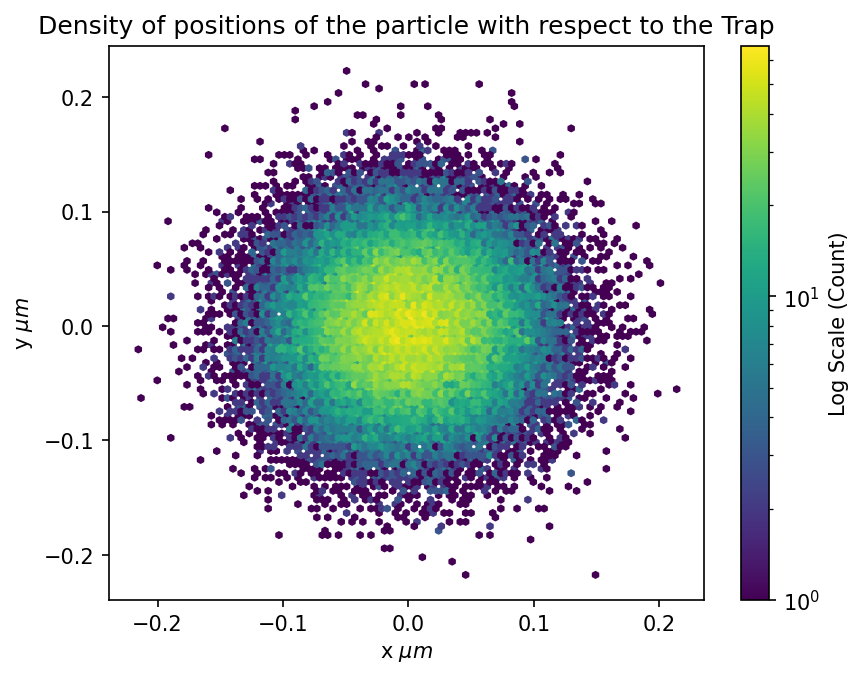

In [115]:
plt.figure(dpi=150)
plt.hexbin(x_array_eq, y_array_eq, gridsize=100, cmap='viridis', bins='log')
plt.colorbar(label='Log Scale (Count)')
plt.title(r"Density of positions of the particle with respect to the Trap")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"y $\mu{}m$")
plt.show()

We can then analyze and compare our results with different frequencies, taking the same approach of the displacement.

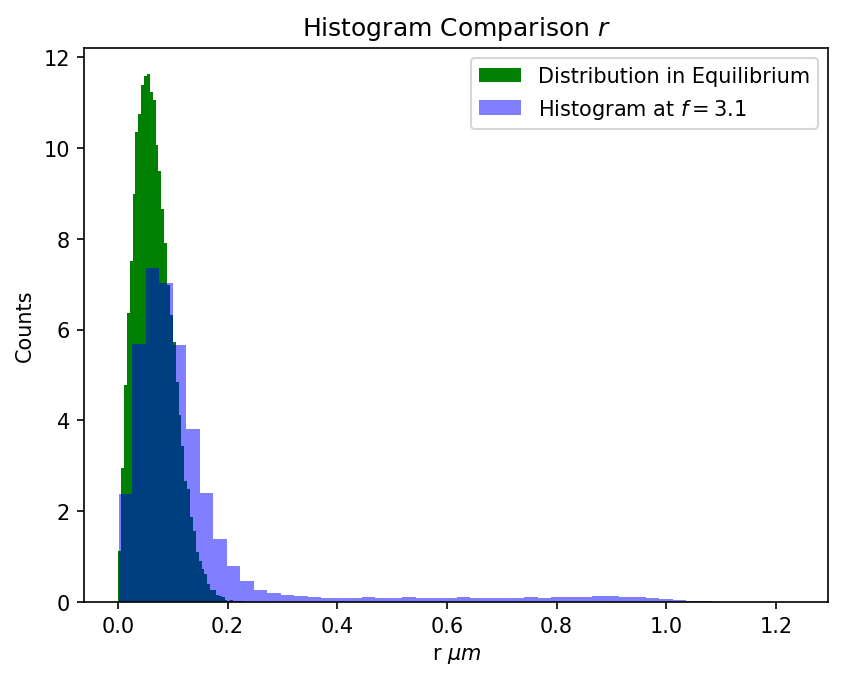

In [116]:
freq_vis = 3.1
dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq_vis}_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
r_array = np.zeros(tot_runs * n_data)

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    y_part = np.array(part.y_pos.tolist())
    r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
    r_array[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]

plt.figure(dpi=150)
plt.hist(r_array_eq, bins=50, label=f"Distribution in Equilibrium", color="g", density=True)
plt.hist(r_array, bins=50, label=fr"Histogram at $f = {freq_vis}$", color="b", alpha=0.5, density=True)
plt.title(r"Histogram Comparison $r$")
plt.xlabel(r"r $\mu{}m$")
plt.ylabel(r"Counts")
plt.legend()
plt.show()

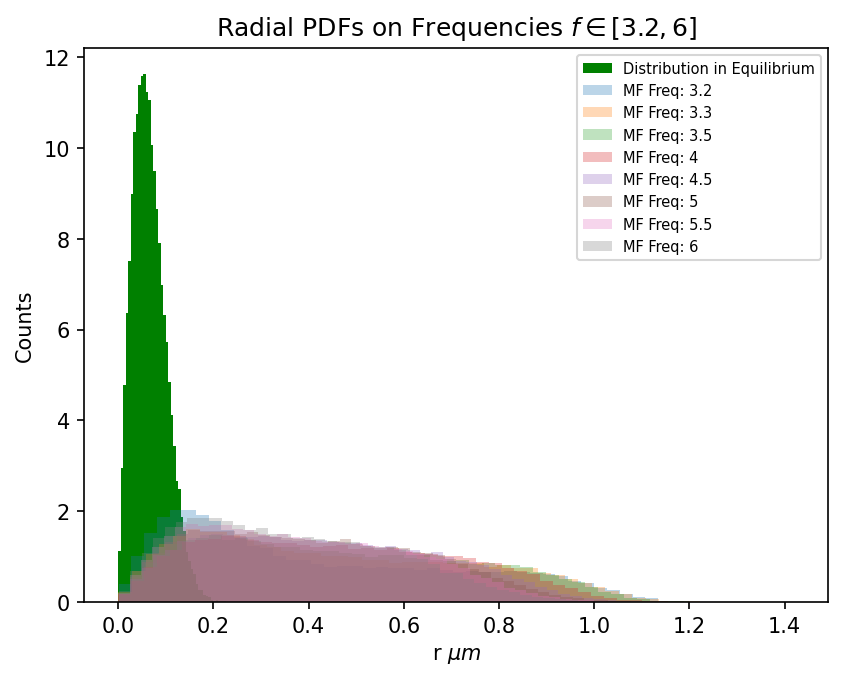

In [117]:
# Sectioning of Frequencies
# freqs = [1, 1.4, 1.5, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1] # Samples with 2 distributions
freqs = [3.2, 3.3, 3.5, 4, 4.5, 5, 5.5, 6] # Break of Gaussian

plt.figure(dpi=150)
plt.hist(r_array_eq, bins=50, label=f"Distribution in Equilibrium", color="g", density=True)

for freq in freqs:
    dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    r_array = np.zeros(tot_runs * n_data)
    for i in range(tot_runs):
        part = data[data["run_number"] == i + 1]
        x_part = np.array(part.x_pos.tolist())
        y_part = np.array(part.y_pos.tolist())
        r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
        r_array[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]
    # Obtain Data for Graph
    plt.hist(r_array, bins=50, alpha=0.3, label=f"MF Freq: {freq}", density=True)

plt.title(rf"Radial PDFs on Frequencies $f \in [{min(freqs)}, {max(freqs)}]$")
plt.xlabel(r"r $\mu{}m$")
plt.ylabel(r"Counts")
plt.legend(fontsize=7)
plt.show()

Find Gaussian fits for the regime in which we see "2 different distributions" $f \in [1, 3.1]$.

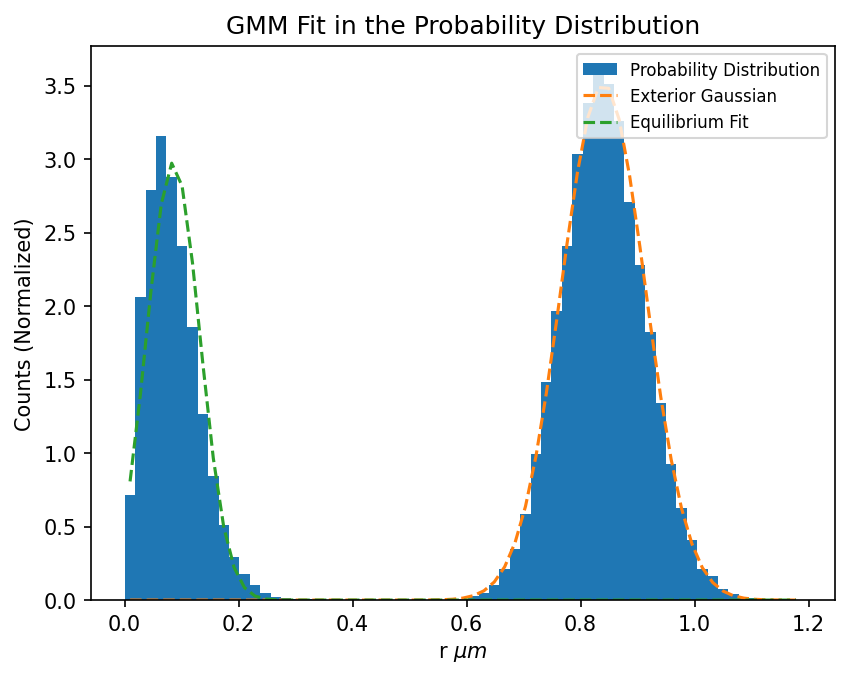

In [ ]:
# Test with a Frequency 
from sklearn.mixture import GaussianMixture

freq_vis = 2

gmm = GaussianMixture(n_components=2, random_state=0)

dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq_vis}_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
r_array = np.zeros(tot_runs * n_data)

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    y_part = np.array(part.y_pos.tolist())
    r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
    r_array[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]

counts_ex, bin_edges = np.histogram(r_array, bins=65, density=True)
r_ex = 0.5 * (bin_edges[1:] + bin_edges[:-1])

r_data = r_array.reshape(-1, 1)
gmm.fit(r_data)

means_gmm = gmm.means_.flatten()
stds_gmm = np.sqrt(gmm.covariances_.flatten())
weights_gmm = gmm.weights_
id_ex = means_gmm.argmax()

pdf_ex = weights_gmm[id_ex]*norm.pdf(r_ex, means_gmm[id_ex], stds_gmm[id_ex])
pdf_eq = weights_gmm[0]*norm.pdf(r_ex, means_gmm[0], stds_gmm[0])

plt.figure(dpi=150)
plt.hist(r_array, bins=65, density=True, label="Probability Distribution")
plt.plot(r_ex, pdf_ex, '--', label=f"Exterior Gaussian")
plt.plot(r_ex, pdf_eq, '--', label=f"Equilibrium Fit")
plt.title("GMM Fit in the Probability Distribution")
plt.legend(fontsize=8, loc='upper right')
plt.xlabel(r"r $\mu{}m$")
plt.ylabel(r"Counts (Normalized)")
plt.show()

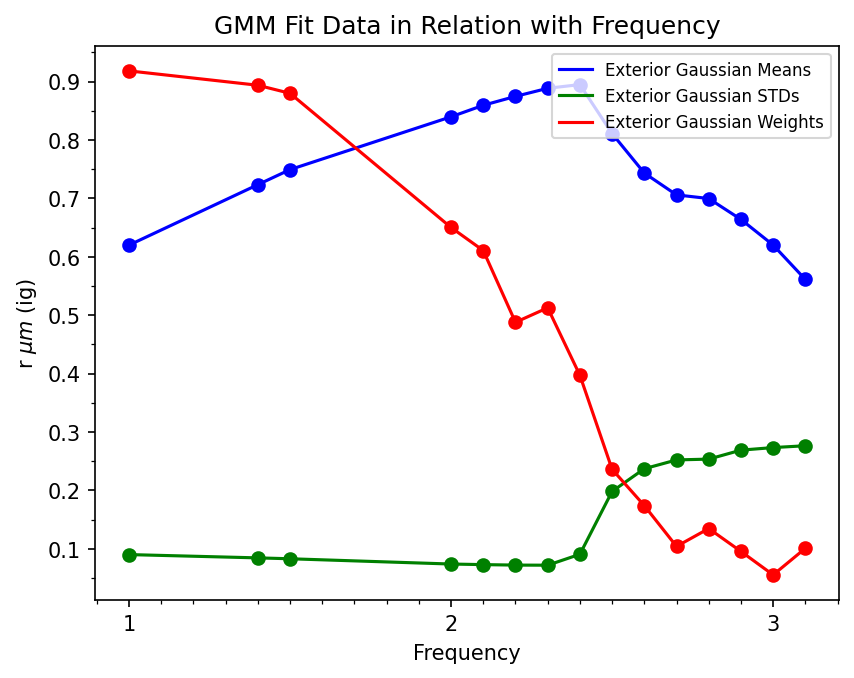

In [119]:
freqs = [1, 1.4, 1.5, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1]
# Save the mean and the std of each for each of the frequencies
f_len = len(freqs)
means_f = np.zeros(f_len)
stds_f = np.zeros(f_len)
weights_f = np.zeros(f_len)

for idx, freq in enumerate(freqs):
    dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    r_array = np.zeros(tot_runs * n_data)
    for i in range(tot_runs):
        part = data[data["run_number"] == i + 1]
        x_part = np.array(part.x_pos.tolist())
        y_part = np.array(part.y_pos.tolist())
        r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
        r_array[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]
    # Obtain Mean and Std of the Second Gaussian
    gmm = GaussianMixture(n_components=2, random_state=0) # Just in case
    r_data = r_array.reshape(-1, 1)
    gmm.fit(r_data)
    means_gmm = gmm.means_.flatten()
    stds_gmm = np.sqrt(gmm.covariances_.flatten())
    weights_gmm = gmm.weights_
    # Get the Gaussian Parameters
    id_gauss = means_gmm.argmax()
    means_f[idx] = means_gmm[id_gauss]
    stds_f[idx] = stds_gmm[id_gauss]
    weights_f[idx] = weights_gmm[id_gauss]
    
plt.figure(dpi=150)
plt.plot(freqs, means_f, color="b", label=f"Exterior Gaussian Means")
plt.scatter(freqs, means_f, color="b")
plt.plot(freqs, stds_f, color="g", label=f"Exterior Gaussian STDs")
plt.scatter(freqs, stds_f, color="g")
plt.plot(freqs, weights_f, color="r", label=f"Exterior Gaussian Weights")
plt.scatter(freqs, weights_f, color="r")
plt.title("GMM Fit Data in Relation with Frequency")
plt.legend(fontsize=8, loc='upper right')
plt.xlabel(r"Frequency")
plt.ylabel(r"r $\mu{}m$ (ig)")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1)) # Showing the number
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1)) # Not showing the number
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1)) # Showing the number
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05)) 
plt.show()
    

Given Boltzmann Distribution:

$$ \rho (r) = \exp(-\frac{U(r)}{k_BT}) $$

We can solve for $U(r)$ so to get the "potential" for each particle. So we have that:

$$ U(r) = -k_BT\ln(\rho(r)) $$

So we can see how this potential changes over time.

C:\Users\emino\AppData\Local\Temp\ipykernel_18556\2278933425.py:22: RuntimeWarning: divide by zero encountered in log
  u_r = -300*np.log(pdf)
C:\Users\emino\AppData\Local\Temp\ipykernel_18556\2278933425.py:22: RuntimeWarning: divide by zero encountered in log
  u_r = -300*np.log(pdf)
C:\Users\emino\AppData\Local\Temp\ipykernel_18556\2278933425.py:22: RuntimeWarning: divide by zero encountered in log
  u_r = -300*np.log(pdf)
C:\Users\emino\AppData\Local\Temp\ipykernel_18556\2278933425.py:22: RuntimeWarning: divide by zero encountered in log
  u_r = -300*np.log(pdf)
C:\Users\emino\AppData\Local\Temp\ipykernel_18556\2278933425.py:22: RuntimeWarning: divide by zero encountered in log
  u_r = -300*np.log(pdf)


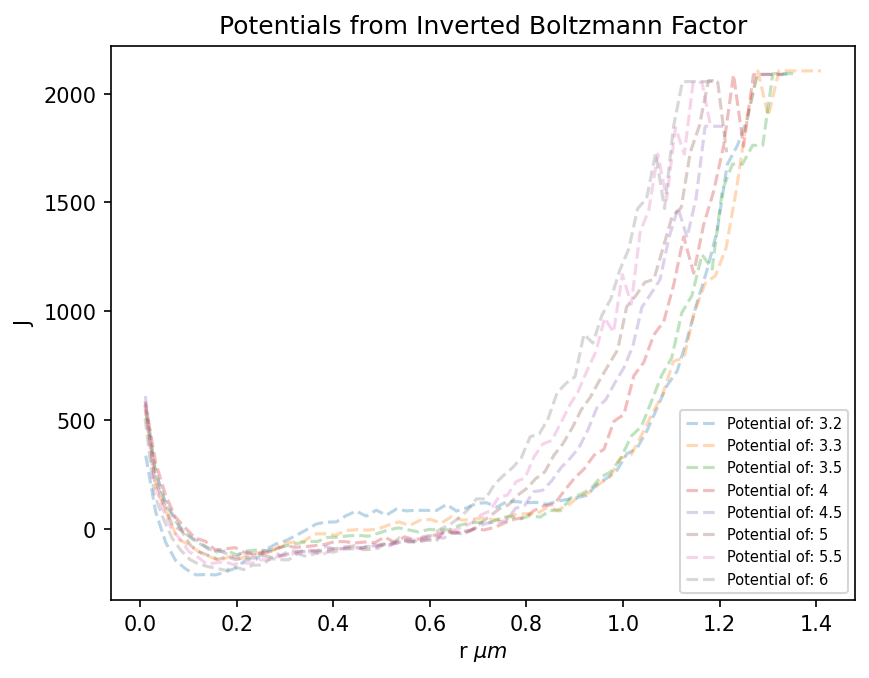

In [120]:
freqs = [1, 1.4, 1.5, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1]
# freqs = [1, 1.4, 1.5, 2, 2.1, 2.2, 2.3, 2.4] # First Ones
freqs = [3.2, 3.3, 3.5, 4, 4.5, 5, 5.5, 6] 
# freqs = [2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1] # Last Ones

# Init Figure
plt.figure(dpi=150)
for idx, freq in enumerate(freqs):
    dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    r_array = np.zeros(tot_runs * n_data)
    for i in range(tot_runs):
        part = data[data["run_number"] == i + 1]
        x_part = np.array(part.x_pos.tolist())
        y_part = np.array(part.y_pos.tolist())
        r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
        r_array[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]
    # Get the distribution as a function
    pdf, bin_edges = np.histogram(r_array, bins=65, density=True)
    r_ex = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    # Get the potential (Assuming kB = 1), T = 300 K
    u_r = -300*np.log(pdf)
    # Deal with infs - convert them to the max (as - sign is in)
    finite_max = np.max(u_r[np.isfinite(u_r)])
    u_r[~np.isfinite(u_r)] = finite_max
    # Plot the potential
    plt.plot(r_ex, u_r, "--", alpha=0.3, label=f"Potential of: {freq}")
    # plt.semilogy(r_ex, pdf, "--", alpha=0.3, label=f"Potential of: {freq}")
    
plt.legend(fontsize=7, loc='lower right')
plt.xlabel(r"r $\mu{}m$")
plt.ylabel(r"J")
plt.title("Potentials from Inverted Boltzmann Factor")
plt.show()

We can analyze the behavior of the distribution not in a 2 dimensional way but rather a 3d (through a heatmap)

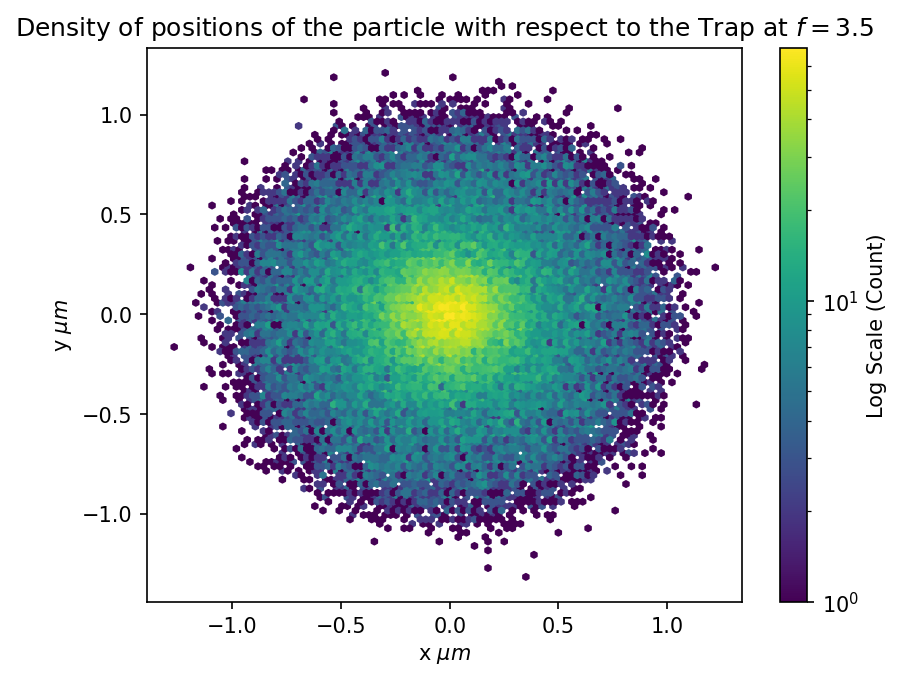

In [122]:
freq_vis = 3.5
dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq_vis}_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
x_array = np.zeros(tot_runs * n_data)
y_array = np.zeros(tot_runs * n_data)
r_array = np.zeros(tot_runs * n_data)

for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    y_part = np.array(part.y_pos.tolist())
    r_part = np.sqrt((x_part - x_part[0])**2 + (y_part - y_part[0])**2)
    # Positions Arrays  Centered in the Trap, and the radial Magnitude
    x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1] - x_part[0]
    y_array[n_data * i : n_data * (i + 1)] = y_part[t_stat_idx:-1] - y_part[0]
    r_array[n_data * i : n_data * (i + 1)] = r_part[t_stat_idx:-1]

plt.figure(dpi=150)
plt.hexbin(x_array, y_array, gridsize=100, cmap='viridis', bins='log')
plt.colorbar(label='Log Scale (Count)')
plt.title(fr"Density of positions of the particle with respect to the Trap at $f = {freq_vis}$")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"y $\mu{}m$")
plt.show()

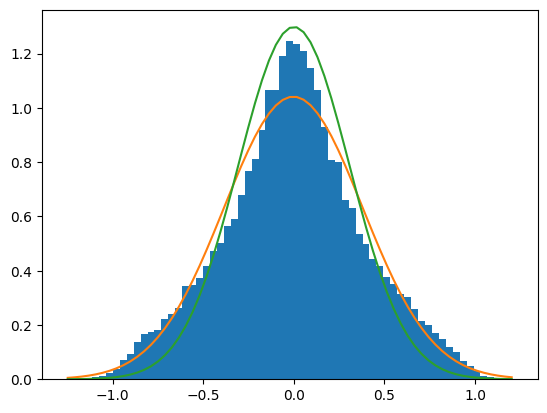

In [138]:
plt.hist(x_array, bins=65, density=True)
counts_ex, bin_edges = np.histogram(x_array, bins=65, density=True)
x_ex = 0.5 * (bin_edges[1:] + bin_edges[:-1])

gmm = GaussianMixture(n_components=1, random_state=0)
x_data = x_array.reshape(-1, 1)
gmm.fit(x_data)

means_gmm = gmm.means_.flatten()
stds_gmm = np.sqrt(gmm.covariances_.flatten())
weights_gmm = gmm.weights_
pdf = weights_gmm[0]*norm.pdf(x_ex, means_gmm[0], stds_gmm[0])

mu_eq, std_eq = norm.fit(x_array_eq)
pdf_eq = norm.pdf(x_ex, 0, std_eq)
pdf_eq = norm.pdf(x_ex, 0, std_eq/(max(counts_ex)/max(pdf_eq)))

plt.plot(x_ex,pdf)
plt.plot(x_ex, pdf_eq)
plt.show()
